In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error

Iniziamo caricando il dataset tips.

In [2]:
tips = sns.load_dataset('tips')

Creiamo quindi i dataset da usare per gli esercizi di regressione, e quelli da usare per gli esercizi di classificazione

In [3]:
# Preparazione del dataset per la regressione
X_reg = tips['total_bill'].values.reshape(-1, 1)
y_reg = tips['tip'].values.flatten()
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, random_state=42)
# Preparazione del dataset per la classificazione
X_clf = tips.loc[:, ('total_bill', 'tip', 'size')].values
y_clf = tips.loc[:, ('day')].values
oc = OrdinalEncoder()
lc = LabelEncoder()
X_clf = oc.fit_transform(X_clf)
y_clf = lc.fit_transform(y_clf)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, random_state=42)

**Esercizio 4.3.1**

Utilizziamo i regressori richiesti per valutare le loro performance in termini di MSE.

In [4]:
# Esercizio 19.2
dt_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()
mlp_reg = MLPRegressor()
# Fit
dt_reg.fit(X_train_reg, y_train_reg)
rf_reg.fit(X_train_reg, y_train_reg)
mlp_reg.fit(X_train_reg, y_train_reg)
# Visualizzazione risultati
print('MSE')
print('DT {}'.format(round(mean_squared_error(y_test_reg, dt_reg.predict(X_test_reg)), 2)))
print('RF {}'.format(round(mean_squared_error(y_test_reg, rf_reg.predict(X_test_reg)), 2)))
print('MLP {}'.format(round(mean_squared_error(y_test_reg, mlp_reg.predict(X_test_reg)), 2)))

MSE
DT 1.54
RF 1.14
MLP 1.19


**Esercizio 4.3.2**

Utilizziamo i classificatori specificati per valutare le loro performance in termini precisione, recall, ed accuracy. Usiamo il `classificaton_report`.

In [5]:
# Esercizio 19.1
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
mlp_clf = MLPClassifier()
# Fit
dt_clf.fit(X_train_clf, y_train_clf)
rf_clf.fit(X_train_clf, y_train_clf)
mlp_clf.fit(X_train_clf, y_train_clf)
# Predict
y_pred_dt = dt_clf.predict(X_test_clf)
y_pred_rf = rf_clf.predict(X_test_clf)
y_pred_mlp = mlp_clf.predict(X_test_clf)

In [6]:
print('DT')
print(classification_report(y_test_clf, y_pred_dt, target_names=['Fri', 'Sat', 'Sun', 'Thur']))

DT
              precision    recall  f1-score   support

         Fri       0.00      0.00      0.00         3
         Sat       0.42      0.48      0.44        21
         Sun       0.60      0.30      0.40        20
        Thur       0.35      0.41      0.38        17

    accuracy                           0.38        61
   macro avg       0.34      0.30      0.31        61
weighted avg       0.44      0.38      0.39        61



In [7]:
print('RF')
print(classification_report(y_test_clf, y_pred_rf, target_names=['Fri', 'Sat', 'Sun', 'Thur']))

RF
              precision    recall  f1-score   support

         Fri       0.17      0.33      0.22         3
         Sat       0.45      0.48      0.47        21
         Sun       0.47      0.35      0.40        20
        Thur       0.39      0.41      0.40        17

    accuracy                           0.41        61
   macro avg       0.37      0.39      0.37        61
weighted avg       0.43      0.41      0.41        61



In [8]:
print('MLP')
print(classification_report(y_test_clf, y_pred_mlp, target_names=['Fri', 'Sat', 'Sun', 'Thur']))

MLP
              precision    recall  f1-score   support

         Fri       0.00      0.00      0.00         3
         Sat       0.00      0.00      0.00        21
         Sun       0.35      0.30      0.32        20
        Thur       0.24      0.53      0.33        17

    accuracy                           0.25        61
   macro avg       0.15      0.21      0.16        61
weighted avg       0.18      0.25      0.20        61



c:\Users\Angelo\.virtualenvs\pcs-exercises-v7kX8Rwt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Angelo\.virtualenvs\pcs-exercises-v7kX8Rwt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Angelo\.virtualenvs\pcs-exercises-v7kX8Rwt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

**Esercizio 4.3.3**

[]

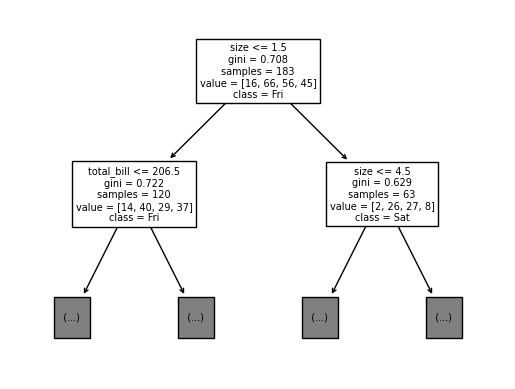

In [9]:
plot_tree(
    dt_clf,
    max_depth=1,
    feature_names=['total_bill', 'tip', 'size'],
    class_names=['Thu', 'Fri', 'Sat', 'Sun'])
plt.plot()

**Esercizio 4.3.4**

Per modificare i parametri, possiamo creare dei nuovi classificatori, oppure usare il metodo `set_params`. Vediamo cosa accade in entrambi i casi.

Iniziamo creando un nuovo albero decisionale, ed usando un valore di `max_depth` pari a 2; inn uqesto caso, dovremo addestrare il nuovo classificatore sui dati di training.

In [10]:
dt_clf_new = DecisionTreeClassifier(max_depth=2)
dt_clf_new.fit(X_train_clf, y_train_clf)

DecisionTreeClassifier(max_depth=2)

Se invece volessimo usare il metodo `set_params`, dovremmo creare un dizionario in cui le chiavi sono gli attributi da modificare, ed i valori sono i nuovi valori da associare.

In [11]:
dt_clf.set_params(**{'max_depth': 2})

DecisionTreeClassifier(max_depth=2)

Usiamo quest'ultimo approccio, e verifichiamo i risultati ottenuti.

In [12]:
rf_clf.set_params(**{'n_estimators': 150})
mlp_clf.set_params(**{'hidden_layer_sizes': (5, 50)})
# Fit
dt_clf.fit(X_train_clf, y_train_clf)
rf_clf.fit(X_train_clf, y_train_clf)
mlp_clf.fit(X_train_clf, y_train_clf)
# Predict
y_pred_dt = dt_clf.predict(X_test_clf)
y_pred_rf = rf_clf.predict(X_test_clf)
y_pred_mlp = mlp_clf.predict(X_test_clf)

In [13]:
print('DT')
print(classification_report(y_test_clf, y_pred_dt, target_names=['Fri', 'Sat', 'Sun', 'Thur']))

DT
              precision    recall  f1-score   support

         Fri       0.00      0.00      0.00         3
         Sat       0.38      0.71      0.49        21
         Sun       0.45      0.45      0.45        20
        Thur       0.00      0.00      0.00        17

    accuracy                           0.39        61
   macro avg       0.21      0.29      0.24        61
weighted avg       0.28      0.39      0.32        61



c:\Users\Angelo\.virtualenvs\pcs-exercises-v7kX8Rwt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Angelo\.virtualenvs\pcs-exercises-v7kX8Rwt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Angelo\.virtualenvs\pcs-exercises-v7kX8Rwt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [14]:
print('RF')
print(classification_report(y_test_clf, y_pred_rf, target_names=['Fri', 'Sat', 'Sun', 'Thur']))

RF
              precision    recall  f1-score   support

         Fri       0.14      0.33      0.20         3
         Sat       0.50      0.48      0.49        21
         Sun       0.54      0.35      0.42        20
        Thur       0.33      0.41      0.37        17

    accuracy                           0.41        61
   macro avg       0.38      0.39      0.37        61
weighted avg       0.45      0.41      0.42        61



In [15]:
print('MLP')
print(classification_report(y_test_clf, y_pred_mlp, target_names=['Fri', 'Sat', 'Sun', 'Thur']))

MLP
              precision    recall  f1-score   support

         Fri       0.00      0.00      0.00         3
         Sat       0.33      0.76      0.46        21
         Sun       1.00      0.10      0.18        20
        Thur       0.00      0.00      0.00        17

    accuracy                           0.30        61
   macro avg       0.33      0.22      0.16        61
weighted avg       0.44      0.30      0.22        61

